In [1]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df =pd.read_csv('cardekho_data.csv')

In [5]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [9]:
col= df.select_dtypes(include=['int','float'])

In [13]:
col

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0
...,...,...,...,...,...
296,2016,9.50,11.60,33988,0
297,2015,4.00,5.90,60000,0
298,2009,3.35,11.00,87934,0
299,2017,11.50,12.50,9000,0


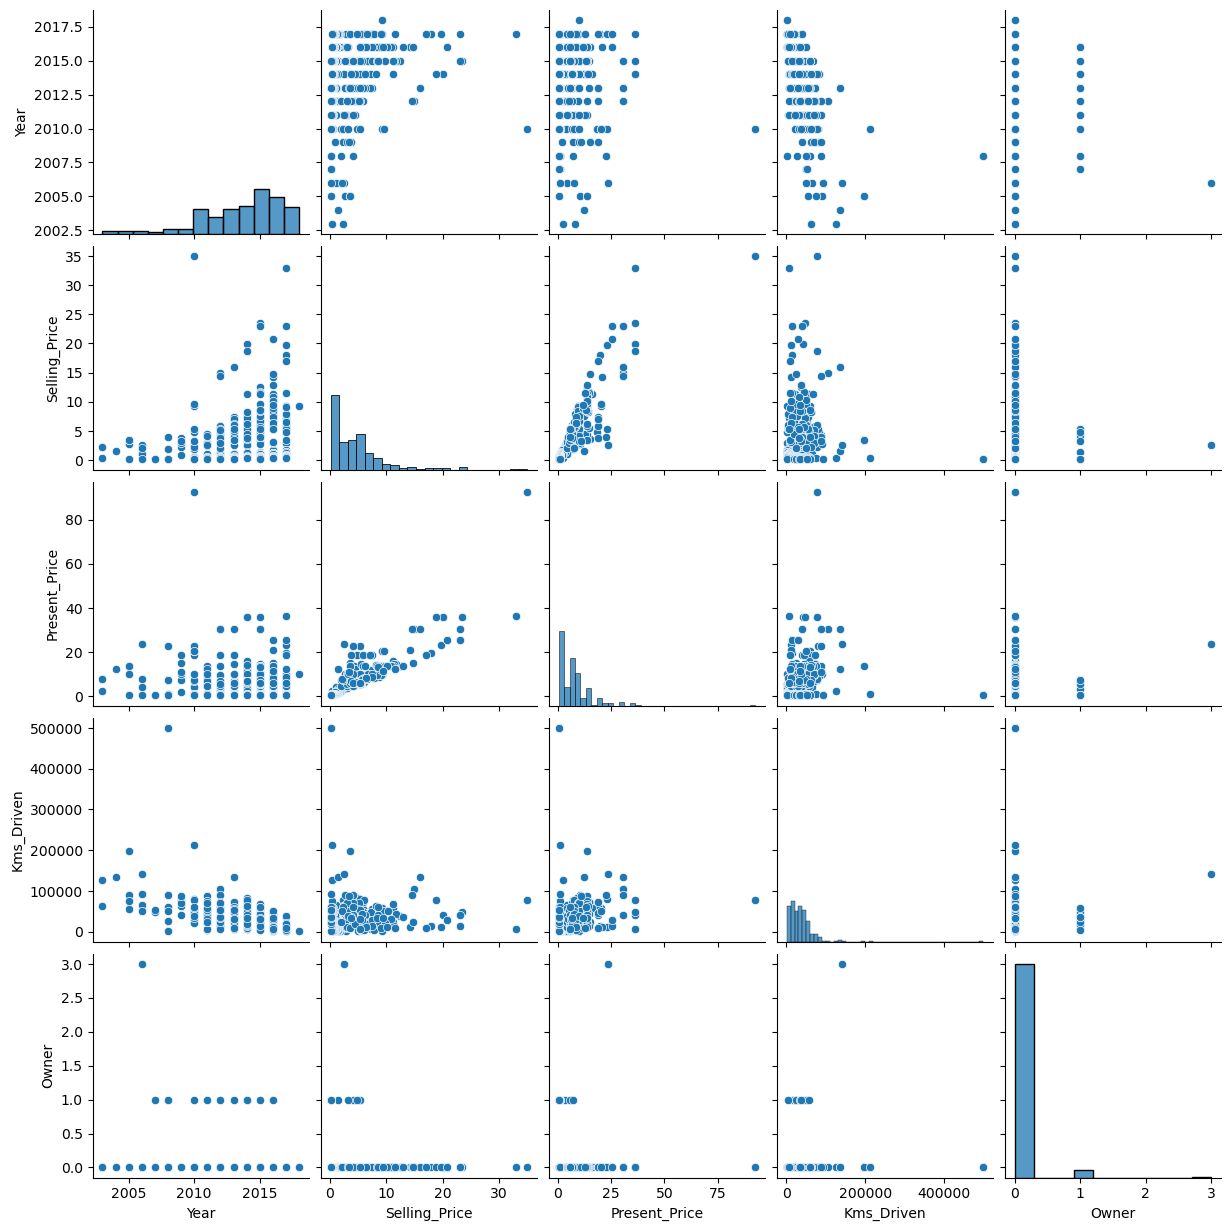

In [11]:
sns.pairplot(col)

<Axes: >

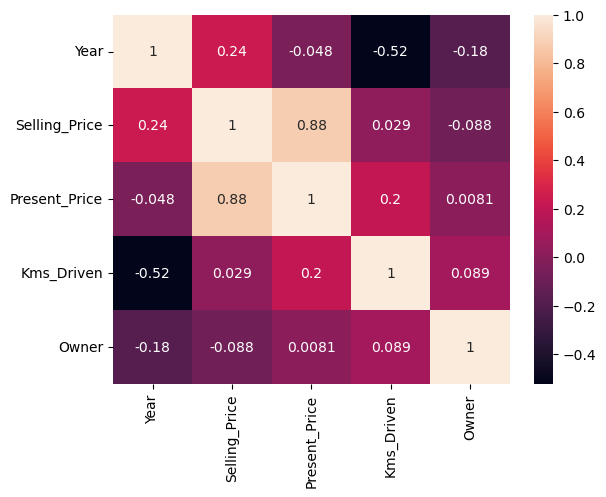

In [15]:
sns.heatmap(col.corr(),annot=True)

In [17]:
col1 = df.select_dtypes(include='object').columns

In [19]:
col1

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

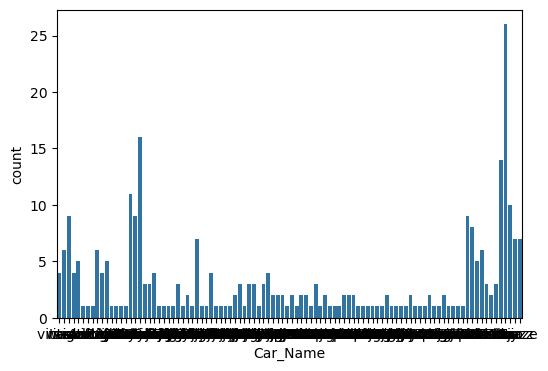

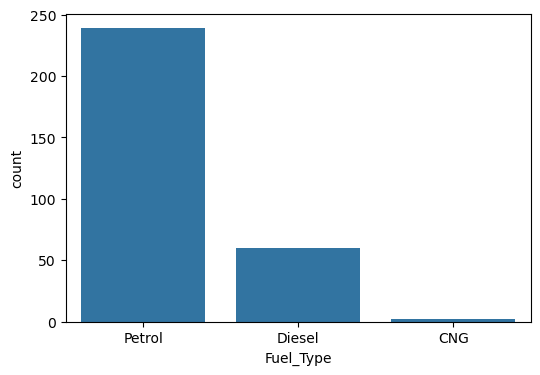

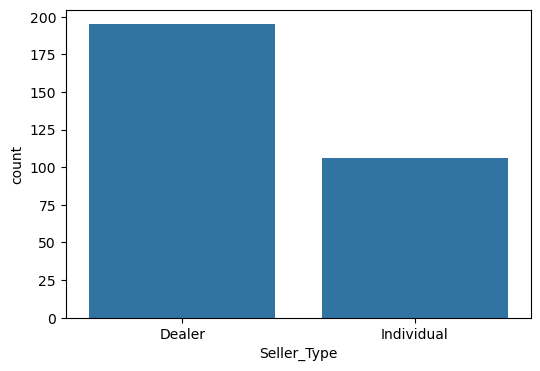

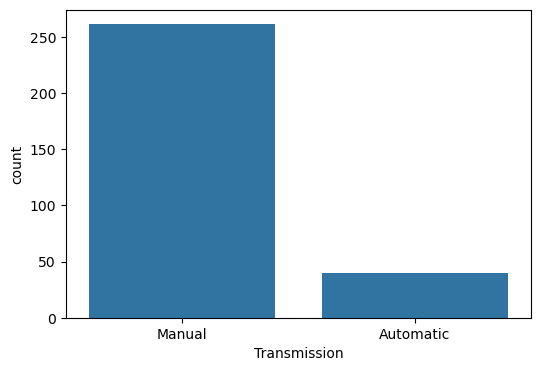

In [23]:
for i in col1:
    plt.figure(figsize=(6,4))
    sns.countplot(x=i,data=df)

In [25]:
df.drop(columns='Car_Name',inplace=True)

In [27]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [29]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [42]:
 aaa=df.select_dtypes(include="object").columns

In [50]:
aaa

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [62]:
for i in aaa:
    df[i]= label.fit_transform(df[i])

In [64]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,1,0,1,0
297,2015,4.00,5.90,60000,2,0,1,0
298,2009,3.35,11.00,87934,2,0,1,0
299,2017,11.50,12.50,9000,1,0,1,0


In [70]:
x= df.drop(columns='Selling_Price')
y=df['Selling_Price']

In [94]:
from sklearn.model_selection import train_test_split ,RandomizedSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [82]:
x_train.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')

In [53]:
y_pred

array([ 0.4398, 11.1623,  4.873 ,  0.2091,  7.64  ,  6.192 ,  1.1009,
        0.5855,  0.4665,  6.849 ,  7.9904,  1.0969,  8.0699,  0.4553,
        5.352 ,  2.6315,  1.1385, 14.3819,  0.4665,  1.537 ,  0.3249,
        8.0096,  4.7265,  2.731 ,  0.4999,  3.3985,  5.3645,  3.142 ,
        1.1901,  1.1671,  0.4124,  9.7445,  0.4552,  2.6229,  7.9623,
        4.111 ,  6.382 ,  6.3491,  2.514 ,  7.0864,  4.1828,  3.7811,
        4.9145,  0.5697,  6.0395,  0.7306,  7.985 ,  6.826 ,  2.905 ,
        3.4705,  4.9655,  1.5   , 22.6591, 20.7767,  6.2985, 10.9519,
        5.096 ,  9.3365,  2.7094,  6.7064,  0.2365])

In [47]:
y_test

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64

In [49]:
y_pred = rfr.predict(x_test)

In [57]:
from sklearn.metrics import r2_score


In [59]:
rfr.score(x_train,y_train)

0.9834707635797522

In [61]:
RandomForestRegressor()

RandomForestRegressor()

In [63]:
param ={
    'n_estimators':[100,200,300,400],
    'max_depth':[None,4,10,15,20],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
  
}

In [65]:
random2 = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42), 
    param_distributions= param,
    n_iter=20,
    cv=3,
    n_jobs=-1,
    verbose=1
)

In [67]:
random2.fit(x_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 4, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   verbose=1)

In [68]:
random2.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 20}

In [69]:
estimators =random2.best_estimator_

In [70]:
y_best =estimators.predict(x_test)

In [71]:
r2_score(y_test,y_best)

0.9635303390155866

In [72]:
r2_score(y_test,y_pred)
r2_score(y_test,y_pred)

0.9616981508899042

In [154]:
import joblib
with open('cardekhopkl.pkl','wb') as fs:
    joblib.dump(rfr,fs)
# with open('scalerpkl.pkl','wb') as fs:
#     joblib.dump(,fs)    

In [73]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')